<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 5
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

         X0      X1     X2      X3     X4     X5     X6      X7      X8  \
0     8.219   9.589  6.849   5.479  1.370  6.849  2.740   6.849   1.370   
1    11.675   6.091  5.584   2.030  0.000  6.091  6.091   3.553   1.523   
2     9.091   6.061  4.762   6.494  2.165  6.494  3.463   6.494   3.896   
3     4.895   4.196  2.797   1.399  7.692  1.399  2.797   6.993   0.699   
4     7.143   2.381  9.524   4.762  2.381  4.762  0.000  11.905   4.762   
..      ...     ...    ...     ...    ...    ...    ...     ...     ...   
995   4.950   3.960  3.960   3.960  4.950  5.941  1.980   2.970   1.980   
996   5.085  10.169  0.000   0.000  5.085  3.390  3.390   1.695  10.169   
997   3.205   9.615  4.487   8.974  1.923  9.615  1.923   7.051   0.641   
998   7.463   4.975  4.478  10.945  1.493  4.478  3.980   8.955   2.985   
999   6.364   1.818  2.727  10.000  3.636  8.182  4.

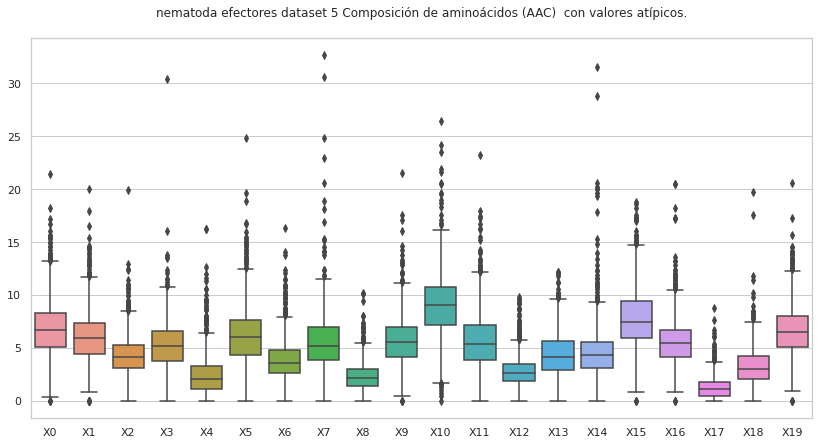

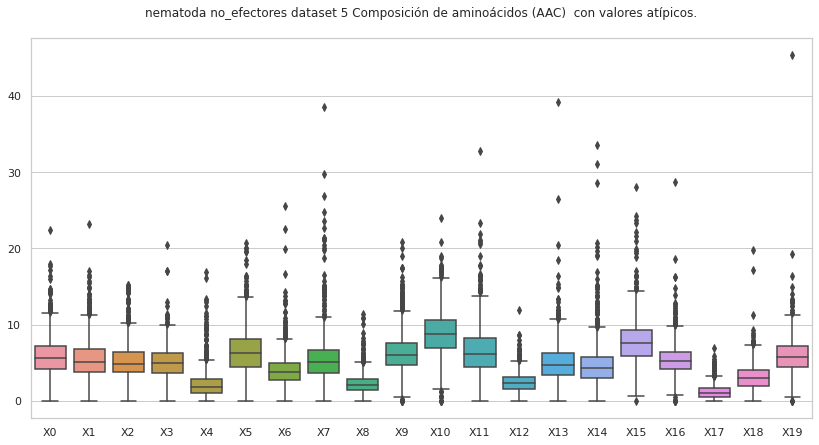

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4     X5     X6     X7     X8      X9  \
0     8.219  9.589  6.849   5.479  1.370  6.849  2.740  6.849  1.370   5.479   
1    11.675  6.091  5.584   2.030  0.000  6.091  6.091  3.553  1.523   4.061   
2     9.091  6.061  4.762   6.494  2.165  6.494  3.463  6.494  3.896   5.628   
3     4.895  4.196  2.797   1.399  7.692  1.399  2.797  6.993  0.699  11.189   
5    11.184  5.921  3.947   6.579  0.658  5.263  3.947  5.263  1.974   9.211   
..      ...    ...    ...     ...    ...    ...    ...    ...    ...     ...   
992  10.526  6.140  4.386   3.509  3.509  5.263  4.386  2.632  0.877   6.140   
993   4.375  5.000  3.750   6.250  7.500  7.500  4.375  8.125  1.875   8.125   
995   4.950  3.960  3.960   3.960  4.950  5.941  1.980  2.970  1.980   5.941   
998   7.463  4.975  4.478  10.945  1.493  4.478  3.980  8.955  2.985   2.985 

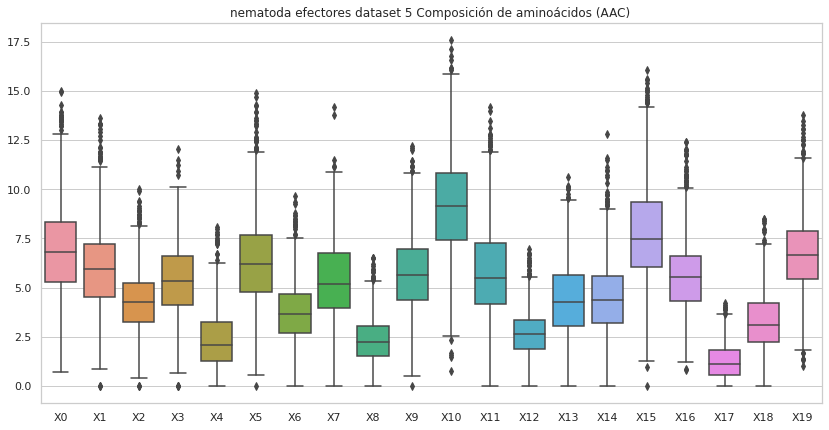

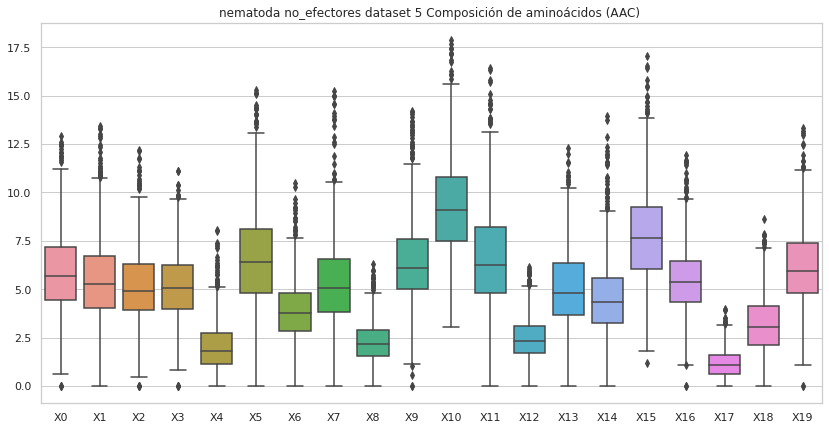

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027899  0.004650  0.018599  0.023249  0.009300  0.023249  0.004650   
1    0.019051  0.000000  0.003313  0.009939  0.001657  0.005798  0.002485   
2    0.056395  0.013427  0.040282  0.040282  0.032225  0.040282  0.024169   
3    0.007599  0.011942  0.002171  0.002171  0.014113  0.010856  0.001086   
4    0.067795  0.022598  0.045197  0.045197  0.045197  0.112992  0.045197   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.034298  0.034298  0.027439  0.041158  0.054878  0.020579  0.013719   
996  1.341346  1.341346  0.000000  0.894231  0.447115  0.447115  2.682693   
997  0.003871  0.002323  0.010839  0.011614  0.002323  0.008517  0.000774   
998  0.025377  0.005075  0.037219  0.015226  0.006767  0.030452  0.010151   
999  0.0

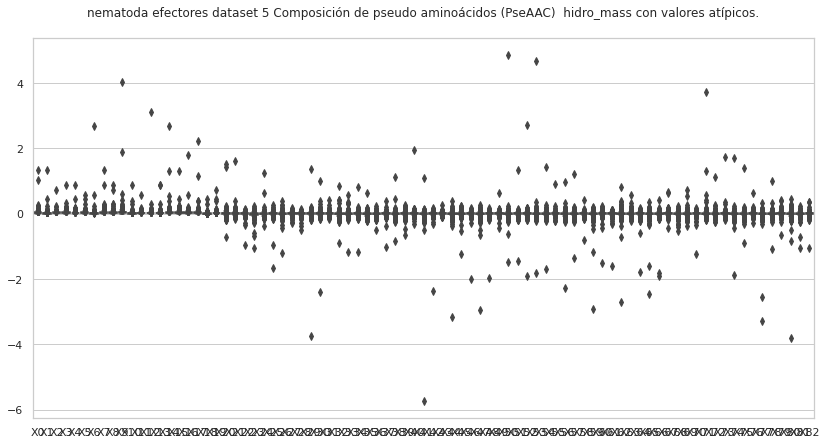

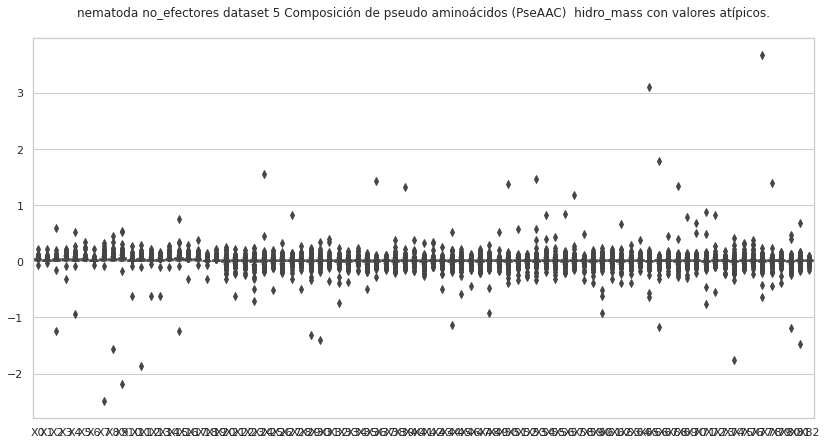

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027899  0.004650  0.018599  0.023249  0.009300  0.023249  0.004650   
1    0.019051  0.000000  0.003313  0.009939  0.001657  0.005798  0.002485   
2    0.056395  0.013427  0.040282  0.040282  0.032225  0.040282  0.024169   
3    0.007599  0.011942  0.002171  0.002171  0.014113  0.010856  0.001086   
5    0.067353  0.003962  0.039619  0.031696  0.019810  0.031696  0.011886   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.043587  0.019372  0.024215  0.043587  0.048430  0.014529  0.072644   
995  0.034298  0.034298  0.027439  0.041158  0.054878  0.020579  0.013719   
997  0.003871  0.002323  0.010839  0.011614  0.002323  0.008517  0.000774   
998  0.025377  0.005075  0.037219  0.015226  0.006767  0.030452  0.010151   
999  0.0

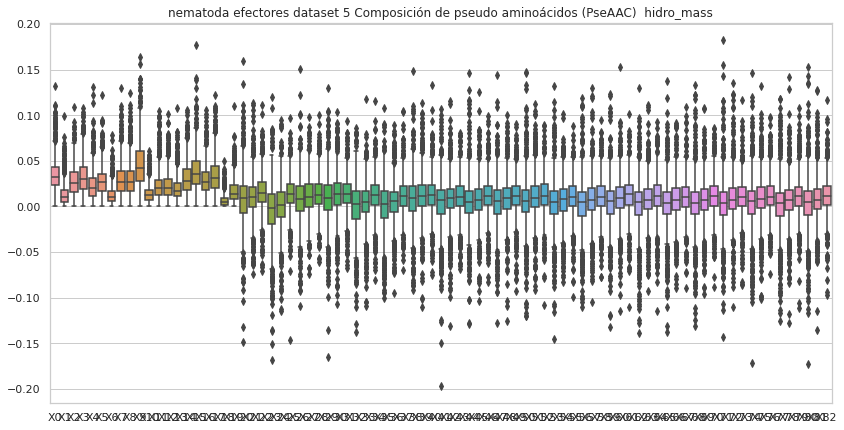

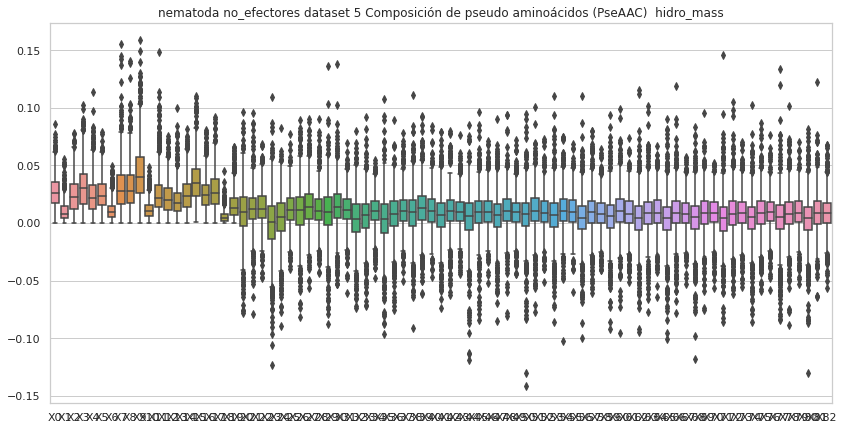

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.058835  0.009806  0.039223  0.049029  0.019612  0.049029  0.009806   
1    0.032546  0.000000  0.005660  0.016980  0.002830  0.009905  0.004245   
2    0.068885  0.016401  0.049203  0.049203  0.039363  0.049203  0.029522   
3    0.027721  0.043561  0.007920  0.007920  0.051481  0.039601  0.003960   
4    0.060968  0.020323  0.040645  0.040645  0.040645  0.101613  0.040645   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.037389  0.037389  0.029911  0.044867  0.059823  0.022433  0.014956   
996  0.058909  0.058909  0.000000  0.039273  0.019636  0.019636  0.117818   
997  0.021225  0.012735  0.059430  0.063675  0.012735  0.046695  0.004245   
998  0.028331  0.005666  0.041552  0.016998  0.007555  0.033997  0.011332   
999  0.041687 

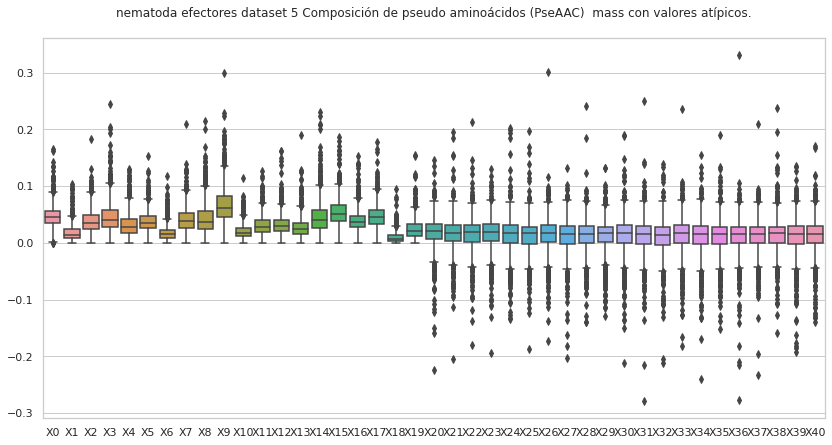

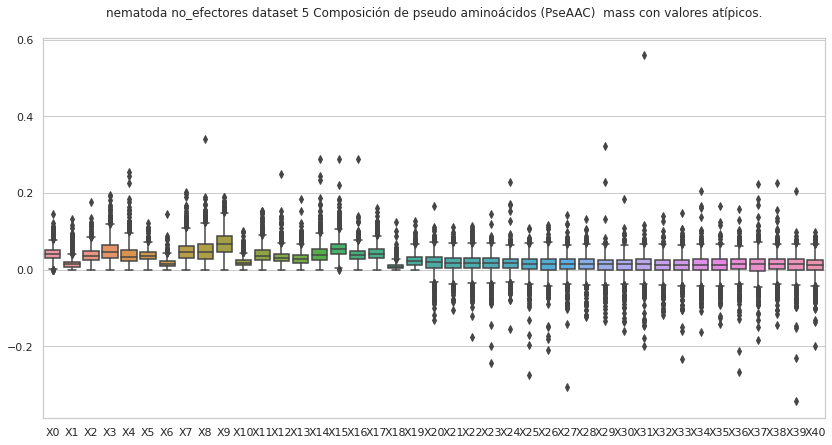

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.058835  0.009806  0.039223  0.049029  0.019612  0.049029  0.009806   
1    0.032546  0.000000  0.005660  0.016980  0.002830  0.009905  0.004245   
2    0.068885  0.016401  0.049203  0.049203  0.039363  0.049203  0.029522   
3    0.027721  0.043561  0.007920  0.007920  0.051481  0.039601  0.003960   
5    0.067416  0.003966  0.039656  0.031725  0.019828  0.031725  0.011897   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.033639  0.057666  0.048055  0.057666  0.048055  0.062472  0.014417   
995  0.037389  0.037389  0.029911  0.044867  0.059823  0.022433  0.014956   
997  0.021225  0.012735  0.059430  0.063675  0.012735  0.046695  0.004245   
998  0.028331  0.005666  0.041552  0.016998  0.007555  0.033997  0.011332   
999  0.041687  0.023821 

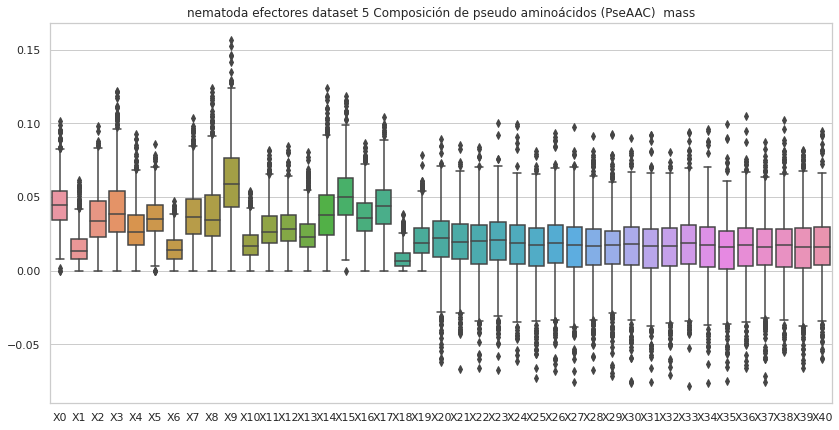

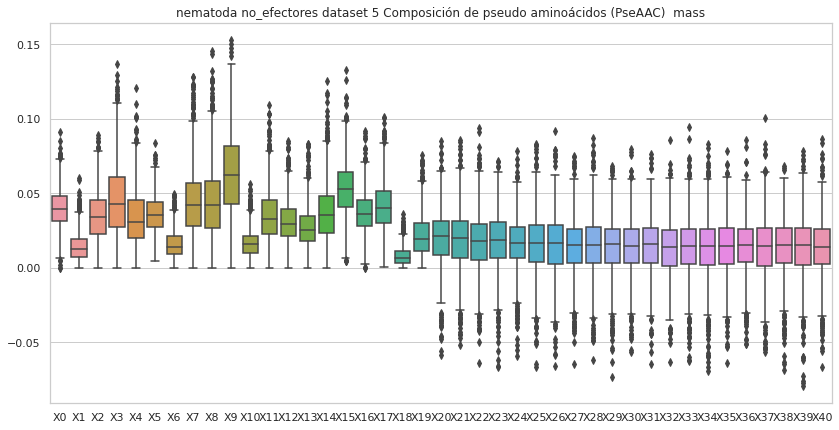

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.032244  0.005374  0.021496  0.026870  0.010748  0.026870  0.005374   
1    0.032970  0.000000  0.005734  0.017202  0.002867  0.010034  0.004300   
2    0.070347  0.016749  0.050248  0.050248  0.040198  0.050248  0.030149   
3    0.008625  0.013553  0.002464  0.002464  0.016018  0.012321  0.001232   
4    0.080984  0.026995  0.053989  0.053989  0.053989  0.134973  0.053989   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.044228  0.044228  0.035383  0.053074  0.070765  0.026537  0.017691   
996  0.290962  0.290962  0.000000  0.193974  0.096987  0.096987  0.581923   
997  0.004125  0.002475  0.011551  0.012376  0.002475  0.009076  0.000825   
998  0.057114  0.011423  0.083767  0.034268  0.015230  0.068537  0.022846   
999  0.048704

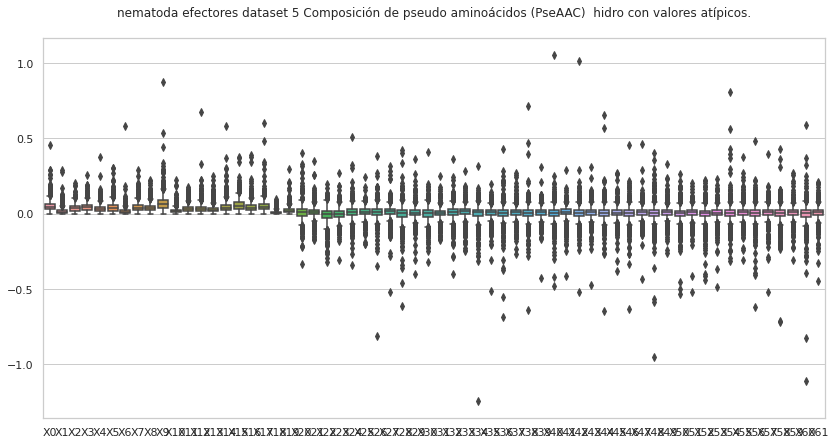

In [ ]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

In [ ]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

In [ ]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

In [ ]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

In [ ]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

In [ ]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

In [ ]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

In [ ]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))